In [25]:
# some useful mysklearn package import statements and reloads
import importlib
import os
import more_itertools

#plotting imports
from tkinter import CENTER
import matplotlib.pyplot as plt

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

# Pokemon Dataset EDA

Before we begin with our tree classifiers, we need to perform some exploratory data analysis. We'll start by loading the contents of each of our various input files into a table. 

In [26]:
filename = os.path.join("input_data", "pokemon_combats.csv")
combats_filename = os.path.join("input_data", "combats.csv")
pokemon_filename = os.path.join("input_data", "pokemon.csv")

pokemon_table = MyPyTable().load_from_file(pokemon_filename)
combats_filename = MyPyTable().load_from_file(combats_filename)
table = MyPyTable().load_from_file(filename)

print(pokemon_table.column_names)


['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


Now that we have the tables, we can start to look at the data. We'll begin by looking at the data stored in pokemon.csv to get a general idea of the stats for the pokemon in the dataset. 

In [27]:
primary_type_vals, primary_type_counts = myutils.get_frequencies(pokemon_table.data, pokemon_table.column_names, "Type 1")
secondary_type_vals, secondary_type_counts = myutils.get_frequencies(pokemon_table.data, pokemon_table.column_names, "Type 2")
print(secondary_type_vals)

#add frequencies to get the total number of apperances by type
for i in range(len(secondary_type_vals)):
    if secondary_type_vals[i] in primary_type_vals:
        p_index = primary_type_vals.index(secondary_type_vals[i])
        primary_type_counts[p_index] += secondary_type_counts[i]

for i in range(len(primary_type_vals)):
    print(primary_type_vals[i], "=", str(primary_type_counts[i]))

['Poison', '', 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass', 'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water', 'Electric', 'Fire', 'Ghost', 'Bug', 'Normal']
Grass = 95
Fire = 64
Water = 126
Bug = 72
Normal = 102
Poison = 62
Electric = 50
Ground = 67
Fairy = 40
Fighting = 53
Psychic = 90
Rock = 58
Ghost = 46
Ice = 38
Dragon = 50
Dark = 51
Steel = 49
Flying = 101


Now that we have type info, we can visualize this to compare which types are the most common. We'll use itertools to sort the list, then visualize using a bar chart.

Ice = 38
Fairy = 40
Ghost = 46
Steel = 49
Electric = 50
Dragon = 50
Dark = 51
Fighting = 53
Rock = 58
Poison = 62
Fire = 64
Ground = 67
Bug = 72
Psychic = 90
Grass = 95
Flying = 101
Normal = 102
Water = 126


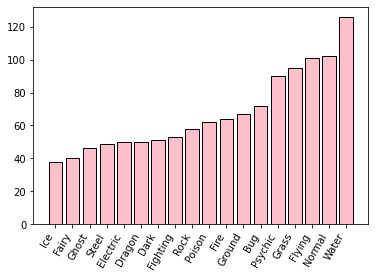

In [29]:
s_counts, s_types = more_itertools.sort_together([primary_type_counts, primary_type_vals])
for i in range(len(s_types)):
    print(s_types[i], "=", str(s_counts[i]))

plt.figure()
plt.bar(s_types, s_counts, align= CENTER, edgecolor='black', color = 'pink')
plt.xticks(s_types, s_types, rotation = 60, ha="right")
plt.show()

Looking at the type data, we can see that most of the Pokemon in our dataset are water types, followed by normal, flying, and grass types. There are much fewer ice and fairy types, which indicates that Pokemon who are traditionally strong against ice or fairy types may find themselves at a disadvantage overall.

Next, we'll look at the various stats for the pokemon in our dataset.

['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


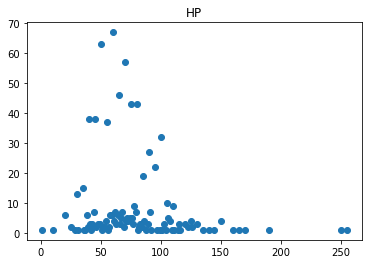

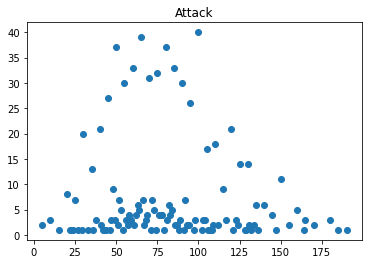

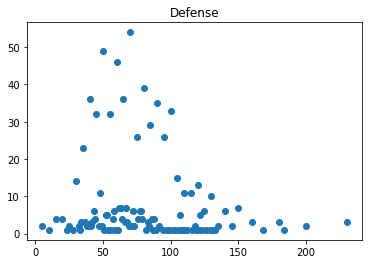

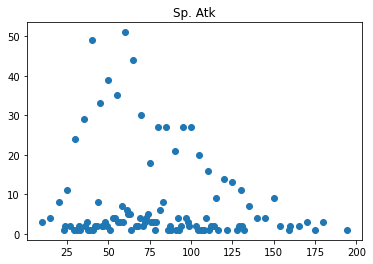

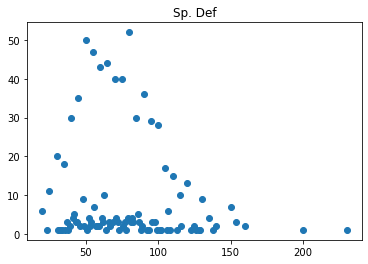

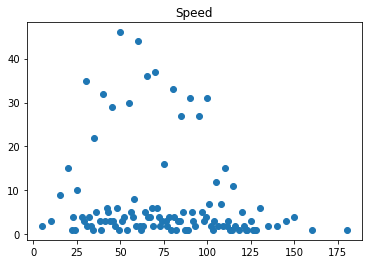

In [40]:
print(pokemon_table.column_names)
stat_header = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
stat_table = myutils.get_columns(pokemon_table.data, pokemon_table.column_names, stat_header)
for stat in stat_header:
    #get the frequencies of each stat
    #make a scatter plot x=stat_vals, y= scat_freq
    stat_vals, stat_freqs = myutils.get_frequencies(stat_table, stat_header, stat)
    plt.title(stat)
    plt.scatter(stat_vals, stat_freqs,)
    plt.show()

Here, we can see general trends in the stats of the pokemon in our dataset. Interestingly, all stats tend to cluster around 50-100, with few outliers surpassing the 150 mark. 

Lastly, we'll analyze the patterns of the pokemon who won their matchups using the information from `pokemon_combats.csv`.

In [53]:
winners = []
winners_header = pokemon_table.column_names.copy()
for instance in table.data:
    curr_winner = []
    if instance[2] == instance[0]:
        curr_winner.extend(instance[3:15])
    else:
        curr_winner.extend(instance[15:])
    winners.append(curr_winner)


The winners table contains information on all of the pokemon who won their matchups. We can perform the same analysis on types and stats as before to see if there are any clear indicators of what determines the victor of a fight.

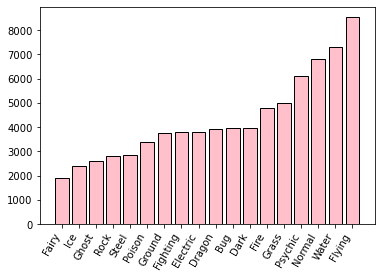

In [58]:
primary_type_vals, primary_type_counts = myutils.get_frequencies(winners, winners_header, "Type 1")
secondary_type_vals, secondary_type_counts = myutils.get_frequencies(winners, winners_header, "Type 2")

#add frequencies to get the total number of apperances by type
for i in range(len(secondary_type_vals)):
    if secondary_type_vals[i] in primary_type_vals:
        p_index = primary_type_vals.index(secondary_type_vals[i])
        primary_type_counts[p_index] += secondary_type_counts[i]


s_counts, s_types = more_itertools.sort_together([primary_type_counts, primary_type_vals])

plt.figure()
plt.bar(s_types, s_counts, align= CENTER, edgecolor='black', color = 'pink')
plt.xticks(s_types, s_types, rotation = 60, ha="right")
plt.show()

Interestingly, flying has overtaken water as the most frequently appearing type. While water types are the most common among Pokemon, flying types seem to have some advantage in battles. Overall, this chart is fairly similar to the one we saw before.

['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


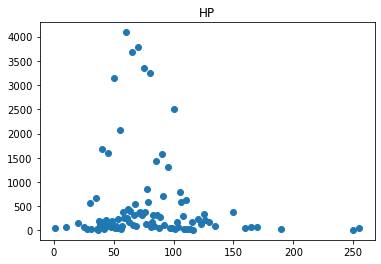

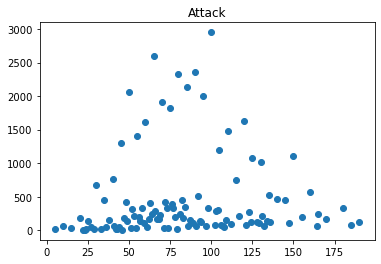

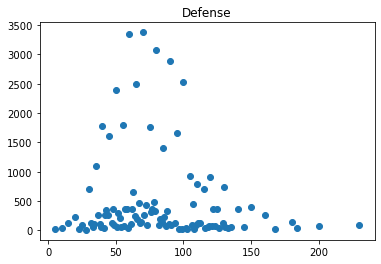

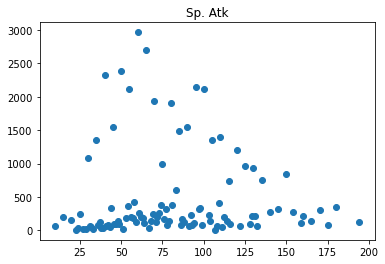

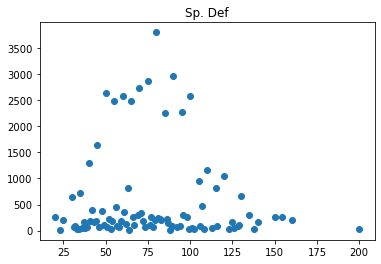

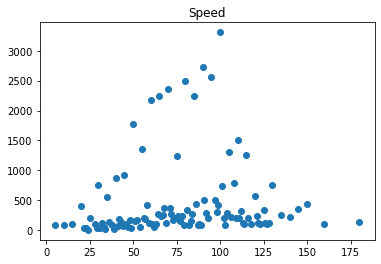

In [59]:
print(pokemon_table.column_names)
stat_header = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
stat_table = myutils.get_columns(winners, winners_header, stat_header)
for stat in stat_header:
    #get the frequencies of each stat
    #make a scatter plot x=stat_vals, y= scat_freq
    stat_vals, stat_freqs = myutils.get_frequencies(stat_table, stat_header, stat)
    plt.title(stat)
    plt.scatter(stat_vals, stat_freqs,)
    plt.show()

These charts are fairly similar to the ones before, but with some slight (yet significant) differences. The average attack stat seems to be higher on this chart, clustering around 75 rather than 50 as before. Also of note is the overall higher frequencies of higher stat values. While still less common than values ranging from 50-100, values about 150 seem to have a higher frequency among winners relative to the overall dataset. Most significant is the difference in the speed charts. The bell curve-like shape of the scatter plot has migrated to the right in the new chart, indicating that Pokemon with higher speed stats tend to win more often, which raises the frequency of higher speed stats.